In [2]:
# importovanie knižníc
import numpy as np
import pandas as pd

In [3]:
#Vytvorenie triedy Perceptron
class Perceptron():
    #def _init_ -> konštruktor, je vytvorený z triedy a umožňuje triede inicializovať atribúty triedy. V našom prípade rýchlosť učenia a počet iterácií
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=15):
        
        #priradenie do premennej self.eta a self.n_iter
        #self-> predstavuje inštanciu triedy. Slúži na prístup k atribútom a metódam triedy v pythone.
        self.eta = rychlost_ucenia 
        self.n_iter = pocet_iteracii      
    
    # def fit ->  proces učenia 
    # X - pole prvkov s trénnovacími vektormi z datasetu
    # y - pole naplnené očakávaným výsledkom -1 a 1
    def fit(self, X,y):
        #širka pola váh je 1+(počet prvkov v riadku matice X)
        self.vahy = np.zeros(1+ X.shape[1])
        # vytvorenie pola errors
        self.errors_=[]
        
        # vytvorenie premenných pre vizualizáciu dát 1
        self.vahy_to_visualize_1=[]
        # vytvorenie premenných pre vizualizáciu dát 2
        self.vahy_to_visualize_2=[]
        # vytvorenie premenných pre vizualizáciu dát 3
        self.vahy_to_visualize_3=[]
        
        #cyklus učenia perceptronu pri ktorom sa určuje aké váhy má mať perceptron na zaklade vstupu  
        for i in range(self.n_iter):
            # naplnenie pola errors nulami
            errors = 0
            #cyklus 2 kde X - pole matic a y - pole vstupov
            for matica,vystup in zip(X,y):
                update = self.eta * (vystup-self.predikcia(matica))
                self.vahy[1:] += update*matica
                self.vahy[0]+= update
                
                # Výpis váh od prvého prvku v poli
                print(self.vahy[1:])
                
                errors += int(update !=0.0)
                #
            self.errors_.append(errors)
            #
            self.vahy_to_visualize_1.append(self.vahy[0])
            #
            self.vahy_to_visualize_2.append(self.vahy[1])
            #
            self.vahy_to_visualize_3.append(self.vahy[2])
        return self  
    #výpočet vstupu
    def net_input(self, X):
        return np.dot(X, self.vahy[1:])+ self.vahy[0]
    
    #Vykonanie lineárnej predpovedi na základe nákladov a gredianu - vzostupne
    # X nové údaje na predpovede
    # return - návrat predikcie
    def predikcia(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [4]:
# do premenej df sa načíta súbor kosatec_data.csv
df=pd.read_csv('kosatec_data.csv', header=None)

In [6]:
# zavolanie a vypísanie súboru kosatec_data.csv
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,kosatec_sibirsky
1,4.9,3.0,1.4,0.2,kosatec_sibirsky
2,4.7,3.2,1.3,0.2,kosatec_sibirsky
3,4.6,3.1,1.5,0.2,kosatec_sibirsky
4,5.0,3.6,1.4,0.2,kosatec_sibirsky
5,5.4,3.9,1.7,0.4,kosatec_sibirsky
6,4.6,3.4,1.4,0.3,kosatec_sibirsky
7,5.0,3.4,1.5,0.2,kosatec_sibirsky
8,4.4,2.9,1.4,0.2,kosatec_sibirsky
9,4.9,3.1,1.5,0.1,kosatec_sibirsky


In [7]:
# naplnenie premenej X hodnotami od 0:150 zo stlpcov s indexom 0 a 2
X = df.iloc[0:150, [0,2]].values
# naplnenie premenej y hodnotami od 0:150 zo stlpcov s indexom 4
y = df.iloc[0:150, 4].values

# vytvorenie matice s hodnotami -1 a 1 na základe podmienky  y == 'kosatec_sibirsky'
y = np.where(y == 'kosatec_sibirsky', -1, 1)
# výpis matice y
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [8]:
# vytvorenie premennej moj_perceptron a nadobudnutie atribútov triedy Perceptron
moj_perceptron = Perceptron()

In [9]:
# výpis premenej moj_perceptron procesesom učenia X,y 
moj_perceptron.fit(X,y)

[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[-0.102 -0.028]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.038 0.066]
[0.0

[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068 

[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068 

[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068  0.182]
[-0.068 

In [10]:
# importovanie knižnice 
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


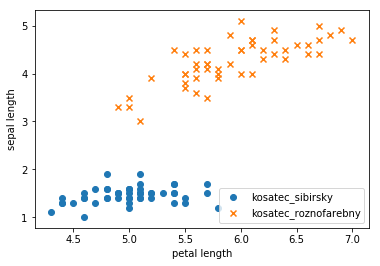

In [11]:
# vybranie prvých 50 prvkov z pola zo stlpca 0 a 1, priradenie markeru o s názvom kosatec_sibirsky
plt.scatter(X[0:50,0],X[0:50,1], marker='o', label='kosatec_sibirsky')
# vybranie prvkov od 50 po 100 z pola zo stlpca 0 a 1, priradenie markeru x s názvom kosatec_roznofarebny
plt.scatter(X[50:100,0],X[50:100,1], marker='x', label='kosatec_roznofarebny')

# legenda grafu 
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()

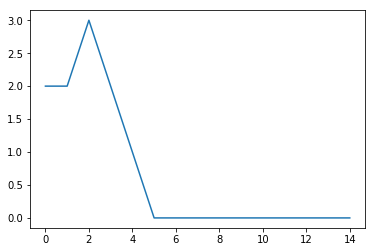

In [12]:
# vykreslenie grafu chyby
plt.plot(moj_perceptron.errors_)